In [2]:
# Plot the complementary cumulative distribution function (CCDF).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import gzip
import urllib.request

In [2]:
data_url = "http://www.uvm.edu/pdodds/teaching/courses/2020-08UVM-300/docs/vocab_cs_mod.txt.gz"
with gzip.open(urllib.request.urlopen(data_url), "rb") as f:
    word_pairs = [[int(d) for d in l.decode("utf-8").split()] for l in f] # k, N_k (N_k words each appear k times in this corpus)
    

In [3]:
k, n_k = zip(*word_pairs)

In [4]:
df = pd.DataFrame({"k":k, "n_k":n_k})
df["k*n_k"] = df["k"]* df["n_k"]
total_words = df["k*n_k"].sum()
df["q"] = df["k*n_k"]/total_words 
print("Total words: %d"%(total_words))

Total words: 834645506207


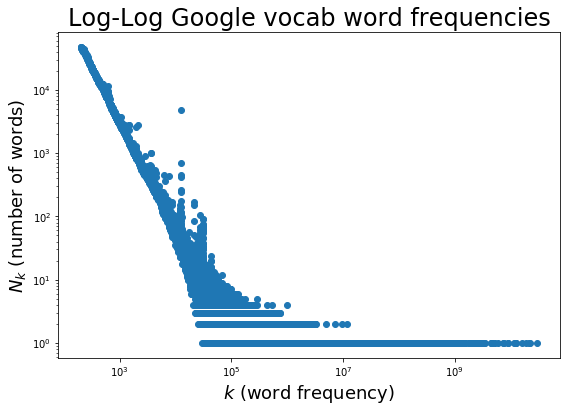

In [5]:
fig, ax = plt.subplots(1, figsize=(9,6))

ax.scatter(df["k"], df["n_k"], c="C0")
ax.set_xlabel(r"$k$ (word frequency)", fontsize=18)
ax.set_ylabel(r"$N_k$ (number of words)", fontsize=18)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Log-Log Google vocab word frequencies", fontsize=24)
plt.savefig("part6_log.png", bbox_inches='tight', pad_inches=0)

plt.show()

In [6]:
words_flipped = np.flip(df["k"].values)
cum_sum_words = np.sum(df["n_k"].values) - np.cumsum(np.flip(df["n_k"].values)) + 1


In [82]:
X = words_flipped
Y = cum_sum_words

X_1 = X[:-7500]
Y_1 = Y[:-7500]
X_2 = X[-7500:]
Y_2 = Y[-7500:]

In [83]:
X_1[-1], Y_1[-1]

(10151083, 7502)

Slope: -0.660578
Intercept: 8.539824
R: -0.999566 (R^2: 0.999131), P_val: 0.000000E+00
Slope: -1.017488
Intercept: 11.044575
R: -0.997430 (R^2: 0.994866), P_val: 0.000000E+00


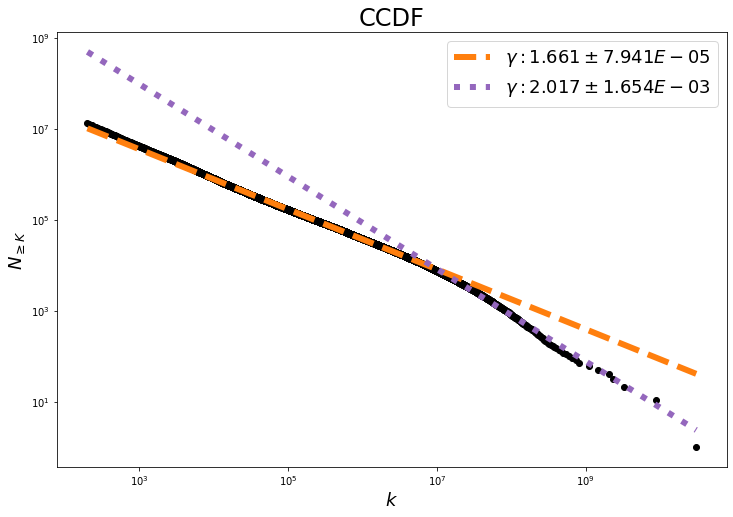

In [45]:
fig, ax = plt.subplots(1, figsize=(12,8))

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(np.log10(X_1), np.log10(Y_1))
predict_log1 = lambda n: intercept1 + slope1 * n

print("Slope: %.6f"%slope1)
print("Intercept: %.6f"%intercept1)
print("R: %.6f (R^2: %.6f), P_val: %.6E"%( r_value1, r_value1**2, p_value1))

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(np.log10(X_2), np.log10(Y_2))
predict_log2 = lambda n: intercept2 + slope2 * n

print("Slope: %.6f"%slope2)
print("Intercept: %.6f"%intercept2)
print("R: %.6f (R^2: %.6f), P_val: %.6E"%( r_value2, r_value2**2, p_value2))


predictions1 = np.power(10, predict_log1(np.log10(X)))
predictions2 = np.power(10, predict_log2(np.log10(X)))


# Plot 1% of all data points
ax.scatter(X[::10], Y[::10], c="k")
ax.plot(X[::10], predictions1[::10], c="C1", linewidth=6, linestyle='dashed', label=r"$\gamma: %.3f \pm %.3E$"%((-slope1 + 1), std_err1 * 1.96))
ax.plot(X[::10], predictions2[::10], c="C4", linewidth=6, linestyle='dotted', label=r"$\gamma: %.3f \pm %.3E$"%((-slope2 + 1), std_err2 * 1.96))
ax.set_ylabel(r"$N_{ \geq K}$", fontsize=18)
ax.set_xlabel(r"$k$", fontsize=18)
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(fontsize=18, loc="upper right")
ax.set_title("CCDF", fontsize=24)
plt.savefig("Part1_regression.png", bbox_inches='tight', pad_inches=0, dpi=500)
plt.savefig("Part1_regression.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

In [18]:
data_url_2 = "http://www.uvm.edu/pdodds/teaching/courses/2020-08UVM-300/docs/google_vocab_rawwordfreqs.txt.gz"
with gzip.open(urllib.request.urlopen(data_url_2), "rb") as f:
    word_pairs_2 = [[int(d) for d in l.decode("utf-8").split()] for l in f] # k, N_k (N_k words each appear k times in this corpus)
    
words_raw = list(zip(*word_pairs_2))
words_raw = np.array(words_raw).reshape(-1)

In [19]:
words_raw


array([95119665584, 95119665584, 30578667846, ...,         200,
               200,         200])

In [20]:
np.log10(X[:10000]), np.log10(X[10000:])

(array([2.30103   , 2.30319606, 2.30535137, ..., 4.00847242, 4.00851501,
        4.00855759]),
 array([ 4.00860017,  4.00864275,  4.00868532, ..., 10.33434962,
        10.34394068, 10.48541856]))

In [78]:
X = np.arange(1, words_raw.shape[0]+1)
Y = words_raw

X_1 = X[:10000]
Y_1 = Y[:10000]
X_2 = X[10000:]
Y_2 = Y[10000:]

In [81]:
print(X.shape)
X_1[-1], Y_1[-1]

(13588391,)


(10000, 7041056)

In [58]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(np.log10(X_1), np.log10(Y_1))
predict_log1 = lambda n: intercept1 + slope1 * n

print("Slope: %.6f"%slope1)
print("Intercept: %.6f"%intercept1)
print("R: %.6f (R^2: %.6f), P_val: %.6E"%( r_value1, r_value1**2, p_value1))

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(np.log10(X_2), np.log10(Y_2))
predict_log2 = lambda n: intercept2 + slope2 * n

print("Slope: %.6f"%slope2)
print("Intercept: %.6f"%intercept2)
print("R: %.6f (R^2: %.6f), P_val: %.6E"%( r_value2, r_value2**2, p_value2))


predictions1 = np.power(10, predict_log1(np.log10(X)))
predictions2 = np.power(10, predict_log2(np.log10(X)))



Slope: -1.016541
Intercept: 10.960802
R: -0.996873 (R^2: 0.993755), P_val: 0.000000E+00
Slope: -1.414575
Intercept: 12.380788
R: -0.999830 (R^2: 0.999659), P_val: 0.000000E+00


In [59]:
std_err1, std_err2

(0.0008058944324949924, 7.0854713258700445e-06)

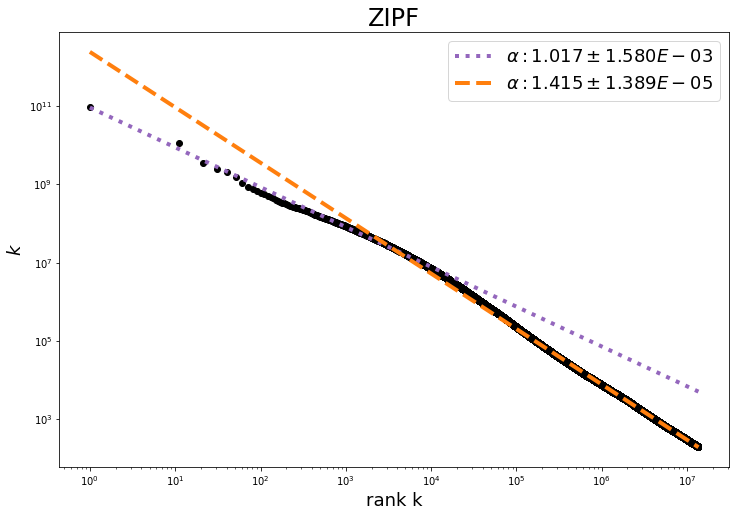

In [72]:
fig, ax = plt.subplots(1, figsize=(12,8)) 
ax.scatter(X[::10], Y[::10], c="k")
ax.plot(X[::20], predictions1[::20], c="C4", linewidth=4, linestyle='dotted', label=r"$\alpha: %.3f \pm %.3E$"%((-1 * slope1), std_err1 * 1.96))
ax.plot(X[::20], predictions2[::20], c="C1", linewidth=4, linestyle='dashed', label=r"$\alpha: %.3f \pm %.3E$"%((-1 * slope2), std_err2 * 1.96))
ax.set_ylabel(r"$k$", fontsize=18)
ax.set_xlabel("rank k", fontsize=18)
ax.set_xscale("log")
ax.set_yscale("log")
# ax.set_ylim(1, 1e11)
# ax.set_xlim(1, 1e9)
ax.legend(fontsize=18, loc="upper right")
ax.set_title("ZIPF", fontsize=24)
plt.savefig("Part3_regression.png", bbox_inches='tight', pad_inches=0, dpi=500)
plt.savefig("Part3_regression.pdf", bbox_inches='tight', pad_inches=0)
plt.show()
